# Доверительные интервалы для оценки среднего

In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерация данных

In [3]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

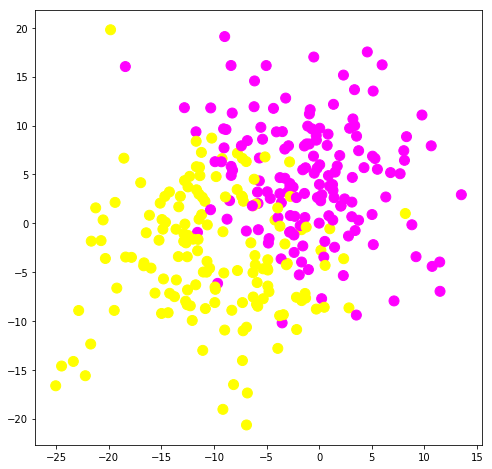

In [8]:
pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], cmap = 'spring', s=100)

## Сравнение линейных моделей

### Точечная оценка

In [9]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 15,
                                                                                    random_state = 1)

In [10]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.88888888888888884

In [11]:
sgd_model = linear_model.SGDClassifier(random_state = 0)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.88888888888888884

### Оценка среднего

In [12]:
sgd_auc_scores = cross_validation.cross_val_score(linear_model.SGDClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

In [13]:
ridge_auc_scores = cross_validation.cross_val_score(linear_model.RidgeClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

### Точечная оценка среднего

In [15]:
print("sgd model auc: mean {0}, std {1}".format(sgd_auc_scores.mean(), sgd_auc_scores.std(ddof=1)))
print("ridge model auc: mean {0}, std {1}".format(ridge_auc_scores.mean(), ridge_auc_scores.std(ddof=1)))

sgd model auc: mean 0.934422831632653, std 0.0699068550776884
ridge model auc: mean 0.9479910714285713, std 0.05365806084995355


### Интервальная оценка среднего 

In [16]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [17]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [19]:
print("sgd model mean auc 95%% confidence interval {}".format(_zconfint_generic(sgd_mean, 
                                                                  sqrt(0.25/len(sgd_auc_scores)), 
                                                                  0.05, 'two-sided')))

print("ridge model mean auc 95%% confidence interval {}".format(_zconfint_generic(ridge_mean, 
                                                                    sqrt(0.25/len(sgd_auc_scores)), 
                                                                    0.05, 'two-sided')))

sgd model mean auc 95%% confidence interval (0.71529219648850773, 1.1535534667767984)
ridge model mean auc 95%% confidence interval (0.72886043628442598, 1.1671217065727166)


#### t-интервал

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [20]:
type(sgd_auc_scores)

numpy.ndarray

In [21]:
sgd_mean_std = sgd_auc_scores.std(ddof=1)/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std(ddof=1)/sqrt(len(ridge_auc_scores))

In [22]:
print("sgd model mean auc 95%% confidence interval {}".format(_tconfint_generic(sgd_mean, sgd_mean_std,
                                                                       len(sgd_auc_scores) - 1,
                                                                       0.05, 'two-sided')))

print("ridge model mean auc 95%% confidence interval {}".format(_tconfint_generic(ridge_mean, ridge_mean_std,
                                                                         len(sgd_auc_scores) - 1,
                                                                         0.05, 'two-sided')))

sgd model mean auc 95%% confidence interval (0.90170541634878609, 0.96714024691652001)
ridge model mean auc 95%% confidence interval (0.92287832593023689, 0.97310381692690573)
